# S7 Assignment

As part of this assignment we need to build a model with
* less than 8000 parameters
* 99.4% test accuracy in atleast two epochs consistently in <= 15 epochs

This problem needs to be solved in 3 steps.

So we have divided 1st 4 Code Tasks into Step1, Next 3 Code Tasks into Step2 and Last 3 into Step3.

## Step-1

* Code 1: Setup
* Code 2: Basic Skeleton
* Code 3: Lighter Model
* Code 4: Batch Normalization

### Model 1 Architecture

Using above 4 tasks/points we were able to build a model with 8.172k parameters.

| Input | Layer | Output | Kernel | RF |
| --- | --- | --- | --- | --- |
| 28x28x1 | Conv1 | 26x26x4 | 3x3 |  3 |
| 26x26x4 | Conv2 | 24x24x8 | 3x3 | 5 |
| 24x24x8 | Conv3 | 22x22x16 | 3x3 |  7 |
| 22x22x16 | MaxPool1 | 11x11x16 | 2x2 |  8 |
| 11x11x16 | Conv4 | 11x11x4 | 1x1 |  8 |
| 11x11x4 | Conv5 | 9x9x8 | 3x3 | 12 |
| 9x9x8 | Conv6 | 7x7x16 | 3x3 |  16 |
| 7x7x16 | Conv7 | 5x5x10 | 3x3 |  20 |
| 5x5x10 | Conv8 | 1x1x10 | 5x5 |  28 |


No of parameters: 8,172

## Target, Result and Analysis of Step-1

#### Target:
    Add Batch normalization to improve model efficiency.
#### Results:
    Parameters : 8.17k
    Best Train Accuracy : 99.73%
    Best Test Accuracy : 99.26%
#### Analysis:
    Before adding batch normalization we had best test accuracy as 98.9% and best training accuracy as 99.5%.
    Upon adding batch norm, we have started to see over-fitting now.
    Even if the model is pushed further, it won't be able to get to 99.4%

## Step-2

* Code 5: Regularization
* Code 6: Global Average Pooling
* Code 7: Increasing Capacity

### Model 2 Architecture

We had the problem with overfitting in Model1 and we were not able to achieve targetted accuracy of 99.4%. Here we use Regularization techniques like dropout to reduce gap between training and test accuracy.

Using above 3 tasks/points we were able to build a model with 8.084k parameters.

| Input | Layer | Output | Kernel | RF |
| --- | --- | --- | --- | --- |
| 28x28x1 | Conv1 | 26x26x4 | 3x3 |  3 |
| 26x26x4 | Conv2 | 24x24x8 | 3x3 | 5 |
| 24x24x8 | Conv3 | 22x22x16 | 3x3 |  7 |
| 22x22x16 | MaxPool1 | 11x11x16 | 2x2 |  8 |
| 11x11x16 | Conv4 | 11x11x4 | 1x1 |  8 |
| 11x11x4 | Conv5 | 9x9x8 | 3x3 | 12 |
| 9x9x8 | Conv6 | 7x7x16 | 3x3 |  16 |
| 7x7x16 | Conv7 | 5x5x32 | 3x3 |  20 |
| 5x5x32 | Conv8 | 5x5x10 | 1x1 |  20 |
| 5x5x10 | GAP | 1x1x10 | 5x5 |  28 |

No of parameters: 8,084

Here we have used Dropout as 0.25 which was used after Conv3 and Conv6.

## Target, Result and Analysis of Step-2

#### Target:
    Add Dropout Layer
    Add GAP Layer to remove big 7x7 kernel
    Increase capacity of model. Add layers at the end.
#### Results:
    Parameters : 8.084k
    Best Train Accuracy : 98.93%
    Best Test Accuracy : 99.09%
#### Analysis:
    Add dropout has reduced the difference between Training and testing accuracy.
    Adding GAP helped in reducing no of parameters from 8.1k to 3.2k.
    As test accuracy was decreased with reduction in parameters, we added capacity at the end layers.
    Model was not overfitting.
    Even if the model is pushed further, it won't be able to get to 99.4%.

## Step-3

* Code 8: Correct Max Pooling Location
* Code 9: Image Augmentation
* Code 10: Playing naively with learning rates

### Model 3 Architecture

we were not able to achieve targetted accuracy of 99.4% with Model2. Here we need to adjust max pooling location as it should be done after 1x1 convolution in the transition block.

Using above 3 tasks/points we were able to build a model with 7.72k parameters.

| Input | Layer | Output | Kernel | RF |
| --- | --- | --- | --- | --- |
| 28x28x1 | Conv1 | 26x26x8 | 3x3 |  3 |
| 26x26x8 | Conv2 | 24x24x16 | 3x3 | 5 |
| 24x24x16 | Conv3 | 24x24x8 | 1x1 | 5 |
| 24x24x8 | MaxPool1 | 12x12x8 | 2x2 |  6 |
| 12x12x8 | Conv4 | 10x10x16 | 3x3 |  10 |
| 10x10x16 | Conv5 | 8x8x16 | 3x3 | 14 |
| 8x8x16 | Conv6 | 6x6x16 | 3x3 |  18 |
| 6x6x16 | Conv7 | 6x6x16 | 1x1 |  18 |
| 6x6x16 | GAP | 1x1x16 | 6x6 |  28 |
| 1x1x16 | Conv8 | 1x1x10 | 1x1 |  28 |

No of parameters: 7720

We have used scheduler as ReduceLROnPlateau.


## Target, Result and Analysis of Step-3 ( Final Model)

#### Target:
    Adjust Max pool location
    Add Image augmentation like Rotation of image
    Change learning rate (  adaptive learning rate )
#### Results:
    Parameters : 7.72k
    Best Train Accuracy : 98.85%
    Best Test Accuracy : 99.40% ( 13th and 14th epoch)
#### Analysis:
    Adjusting max pooling in transition layer and adding dropout with value 0.05 on each layer made model not to overfit at all.
    We have added more layers at the end which improved accuracy.
    As per data, slight rotation of images is required ( we used 15 degrees) which will make training harder and test results better.
    As we have used ReducedLROnPlateau, we are decreasing LR based on the decrease in validation/test loss which led to achieve 99.4% consistently in last 2-3 epochs.

### Import heavenly gods / libraries

In [1]:
from __future__ import print_function
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


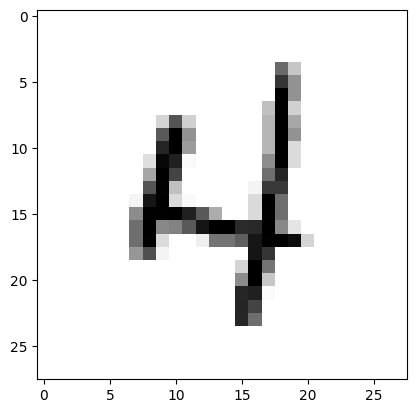

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

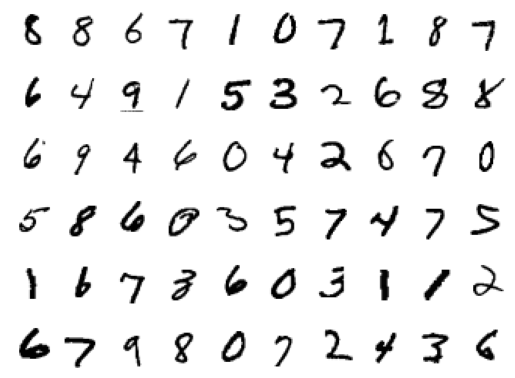

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Calculate model summary of Step1 model ( Model_1)
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [ ]:
from model import Model_1

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_nn = Model_1().to(device)
summary(model_nn, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
       BatchNorm2d-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
            Conv2d-4            [-1, 8, 24, 24]             288
       BatchNorm2d-5            [-1, 8, 24, 24]              16
              ReLU-6            [-1, 8, 24, 24]               0
            Conv2d-7           [-1, 16, 22, 22]           1,152
       BatchNorm2d-8           [-1, 16, 22, 22]              32
              ReLU-9           [-1, 16, 22, 22]               0
        MaxPool2d-10           [-1, 16, 11, 11]               0
           Conv2d-11            [-1, 4, 11, 11]              64
      BatchNorm2d-12            [-1, 4, 11, 11]               8
             ReLU-13            [-1, 4, 11, 11]               0
           Conv2d-14              

# Training and Testing functions used for all 3 models

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

In [2]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

# Train and test Model_1 ( obtained from Step-1 )

In [ ]:
model_nn =  Model_1().to(device)
optimizer = optim.SGD(model_nn.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_nn, device, train_loader, optimizer, epoch)
    test(model_nn, device, test_loader)

EPOCH: 0


Loss=0.06414239853620529 Batch_id=468 Accuracy=93.77: 100%|██████████| 469/469 [00:15<00:00, 30.04it/s]



Test set: Average loss: 0.0554, Accuracy: 9822/10000 (98.22%)

EPOCH: 1


Loss=0.060094740241765976 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:18<00:00, 25.76it/s]



Test set: Average loss: 0.0482, Accuracy: 9847/10000 (98.47%)

EPOCH: 2


Loss=0.07498582452535629 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:16<00:00, 28.84it/s]



Test set: Average loss: 0.0400, Accuracy: 9864/10000 (98.64%)

EPOCH: 3


Loss=0.008841508068144321 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:17<00:00, 27.25it/s]



Test set: Average loss: 0.0324, Accuracy: 9896/10000 (98.96%)

EPOCH: 4


Loss=0.02343960665166378 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 29.05it/s]



Test set: Average loss: 0.0325, Accuracy: 9888/10000 (98.88%)

EPOCH: 5


Loss=0.023923031985759735 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]



Test set: Average loss: 0.0326, Accuracy: 9896/10000 (98.96%)

EPOCH: 6


Loss=0.039685580879449844 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:16<00:00, 28.83it/s]



Test set: Average loss: 0.0303, Accuracy: 9899/10000 (98.99%)

EPOCH: 7


Loss=0.00884371716529131 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:16<00:00, 28.73it/s]



Test set: Average loss: 0.0271, Accuracy: 9905/10000 (99.05%)

EPOCH: 8


Loss=0.0063777826726436615 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:16<00:00, 28.81it/s]



Test set: Average loss: 0.0291, Accuracy: 9905/10000 (99.05%)

EPOCH: 9


Loss=0.08738952875137329 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:16<00:00, 28.59it/s]



Test set: Average loss: 0.0282, Accuracy: 9900/10000 (99.00%)

EPOCH: 10


Loss=0.004893080331385136 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:16<00:00, 28.87it/s]



Test set: Average loss: 0.0299, Accuracy: 9893/10000 (98.93%)

EPOCH: 11


Loss=0.0246930792927742 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:17<00:00, 26.67it/s]



Test set: Average loss: 0.0283, Accuracy: 9913/10000 (99.13%)

EPOCH: 12


Loss=0.001176407909952104 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:16<00:00, 29.04it/s]



Test set: Average loss: 0.0275, Accuracy: 9911/10000 (99.11%)

EPOCH: 13


Loss=0.004486401099711657 Batch_id=468 Accuracy=99.58: 100%|██████████| 469/469 [00:16<00:00, 29.09it/s]



Test set: Average loss: 0.0242, Accuracy: 9926/10000 (99.26%)

EPOCH: 14


Loss=0.0036679392214864492 Batch_id=468 Accuracy=99.59: 100%|██████████| 469/469 [00:17<00:00, 27.38it/s]



Test set: Average loss: 0.0251, Accuracy: 9919/10000 (99.19%)

EPOCH: 15


Loss=0.050003502517938614 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:16<00:00, 28.72it/s]



Test set: Average loss: 0.0273, Accuracy: 9907/10000 (99.07%)

EPOCH: 16


Loss=0.0435069240629673 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:17<00:00, 27.23it/s]



Test set: Average loss: 0.0261, Accuracy: 9917/10000 (99.17%)

EPOCH: 17


Loss=0.05648323893547058 Batch_id=468 Accuracy=99.71: 100%|██████████| 469/469 [00:16<00:00, 28.50it/s]



Test set: Average loss: 0.0256, Accuracy: 9915/10000 (99.15%)

EPOCH: 18


Loss=0.011892023496329784 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:17<00:00, 27.58it/s]



Test set: Average loss: 0.0263, Accuracy: 9915/10000 (99.15%)

EPOCH: 19


Loss=0.021021531894803047 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:16<00:00, 28.85it/s]



Test set: Average loss: 0.0267, Accuracy: 9913/10000 (99.13%)



## Target, Result and Analysis of Step-1

#### Target:
    Add Batch normalization to improve model efficiency.
#### Results:
    Parameters : 8.17k
    Best Train Accuracy : 99.73%
    Best Test Accuracy : 99.26%
#### Analysis:
    Before adding batch normalization we had best test accuracy as 98.9% and best training accuracy as 99.5%.
    Upon adding batch norm, we have started to see over-fitting now.
    Even if the model is pushed further, it won't be able to get to 99.4%

Text(0.5, 1.0, 'Test Accuracy')

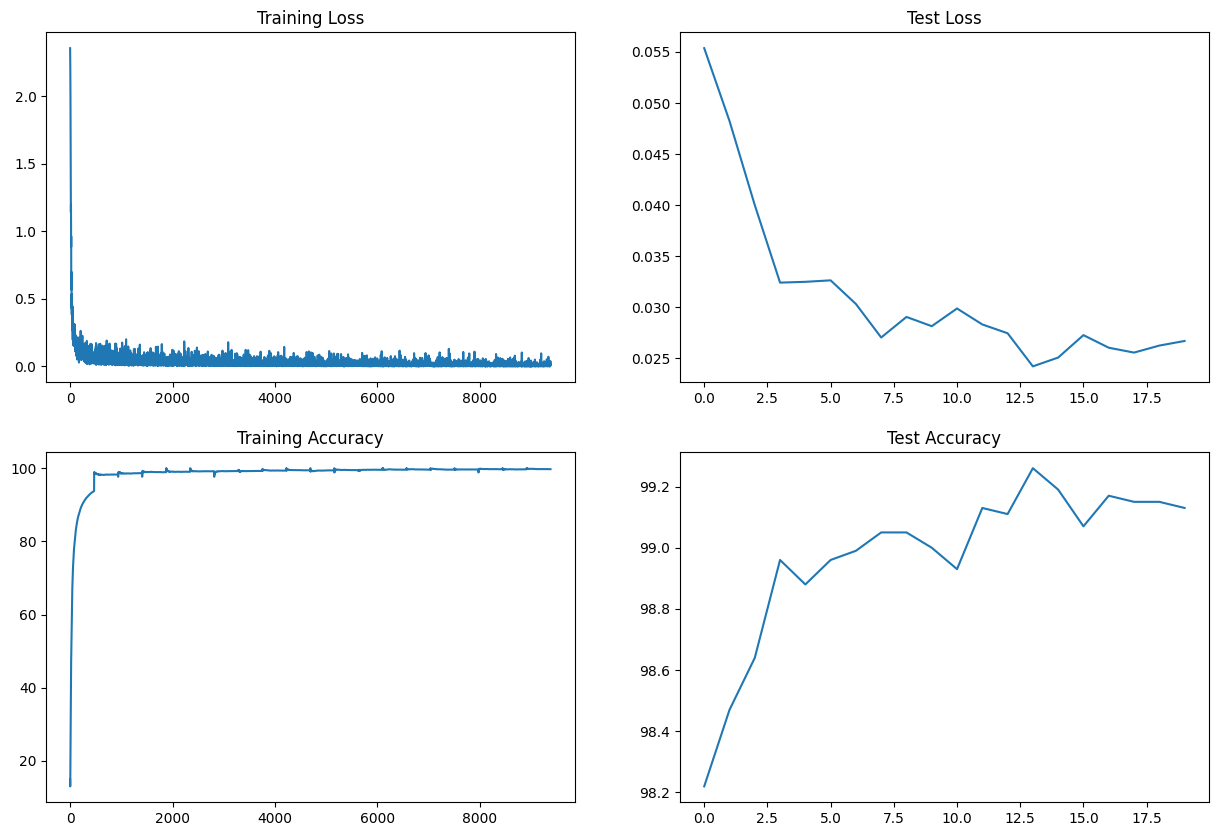

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## Step2 - (Code 5, Code 6, Code 7)

*Note*: We have reused the above train_data, test_data, data loader and train and test functions for this step

#### Import Model_2 which will have Dropout added after few conv layers and big kernel replaced with GAP and increased capacity of the model.

In [ ]:
from model import Model_2

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_nn2 = Model_2().to(device)
summary(model_nn2, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
       BatchNorm2d-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
            Conv2d-4            [-1, 8, 24, 24]             288
       BatchNorm2d-5            [-1, 8, 24, 24]              16
              ReLU-6            [-1, 8, 24, 24]               0
            Conv2d-7           [-1, 16, 22, 22]           1,152
       BatchNorm2d-8           [-1, 16, 22, 22]              32
              ReLU-9           [-1, 16, 22, 22]               0
          Dropout-10           [-1, 16, 22, 22]               0
        MaxPool2d-11           [-1, 16, 11, 11]               0
           Conv2d-12            [-1, 4, 11, 11]              64
      BatchNorm2d-13            [-1, 4, 11, 11]               8
             ReLU-14            [-

In [ ]:
model_nn2 =  Model_2().to(device)
optimizer = optim.SGD(model_nn2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_nn2, device, train_loader, optimizer, epoch)
    test(model_nn2, device, test_loader)

EPOCH: 0


Loss=0.11369997262954712 Batch_id=468 Accuracy=79.95: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]



Test set: Average loss: 0.2033, Accuracy: 9497/10000 (94.97%)

EPOCH: 1


Loss=0.05818198248744011 Batch_id=468 Accuracy=96.50: 100%|██████████| 469/469 [00:20<00:00, 23.36it/s]



Test set: Average loss: 0.0907, Accuracy: 9755/10000 (97.55%)

EPOCH: 2


Loss=0.13168339431285858 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]



Test set: Average loss: 0.0753, Accuracy: 9785/10000 (97.85%)

EPOCH: 3


Loss=0.06531625241041183 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:17<00:00, 26.83it/s]



Test set: Average loss: 0.0747, Accuracy: 9804/10000 (98.04%)

EPOCH: 4


Loss=0.06546429544687271 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:17<00:00, 27.36it/s]



Test set: Average loss: 0.0528, Accuracy: 9844/10000 (98.44%)

EPOCH: 5


Loss=0.06431413441896439 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:17<00:00, 26.69it/s]



Test set: Average loss: 0.0499, Accuracy: 9856/10000 (98.56%)

EPOCH: 6


Loss=0.08729024976491928 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]



Test set: Average loss: 0.0597, Accuracy: 9815/10000 (98.15%)

EPOCH: 7


Loss=0.029552960768342018 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:17<00:00, 27.43it/s]



Test set: Average loss: 0.0480, Accuracy: 9860/10000 (98.60%)

EPOCH: 8


Loss=0.13749738037586212 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:18<00:00, 25.25it/s]



Test set: Average loss: 0.0413, Accuracy: 9881/10000 (98.81%)

EPOCH: 9


Loss=0.015956785529851913 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:16<00:00, 27.60it/s]



Test set: Average loss: 0.0413, Accuracy: 9875/10000 (98.75%)

EPOCH: 10


Loss=0.052858978509902954 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]



Test set: Average loss: 0.0389, Accuracy: 9883/10000 (98.83%)

EPOCH: 11


Loss=0.02992074377834797 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:16<00:00, 28.05it/s]



Test set: Average loss: 0.0337, Accuracy: 9895/10000 (98.95%)

EPOCH: 12


Loss=0.048256147652864456 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:18<00:00, 25.68it/s]



Test set: Average loss: 0.0326, Accuracy: 9907/10000 (99.07%)

EPOCH: 13


Loss=0.017065519466996193 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:17<00:00, 26.43it/s]



Test set: Average loss: 0.0424, Accuracy: 9873/10000 (98.73%)

EPOCH: 14


Loss=0.022398432716727257 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:17<00:00, 26.28it/s]



Test set: Average loss: 0.0442, Accuracy: 9862/10000 (98.62%)

EPOCH: 15


Loss=0.010197379626333714 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:16<00:00, 27.85it/s]



Test set: Average loss: 0.0300, Accuracy: 9909/10000 (99.09%)

EPOCH: 16


Loss=0.029613584280014038 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:17<00:00, 26.54it/s]



Test set: Average loss: 0.0380, Accuracy: 9883/10000 (98.83%)

EPOCH: 17


Loss=0.0859517753124237 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:16<00:00, 28.37it/s]



Test set: Average loss: 0.0306, Accuracy: 9908/10000 (99.08%)

EPOCH: 18


Loss=0.035882990807294846 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:17<00:00, 26.71it/s]



Test set: Average loss: 0.0316, Accuracy: 9891/10000 (98.91%)

EPOCH: 19


Loss=0.016509799286723137 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:16<00:00, 28.51it/s]



Test set: Average loss: 0.0347, Accuracy: 9899/10000 (98.99%)



## Target, Result and Analysis of Step-2

#### Target:
    Add Dropout Layer
    Add GAP Layer to remove big 7x7 kernel
    Increase capacity of model. Add layers at the end.
#### Results:
    Parameters : 8.084k
    Best Train Accuracy : 98.93%
    Best Test Accuracy : 99.09%
#### Analysis:
    Add dropout has reduced the difference between Training and testing accuracy.
    Adding GAP helped in reducing no of parameters from 8.1k to 3.2k.
    As test accuracy was decreased with reduction in parameters, we added capacity at the end layers.
    Model was not overfitting.
    Even if the model is pushed further, it won't be able to get to 99.4%.

Text(0.5, 1.0, 'Test Accuracy')

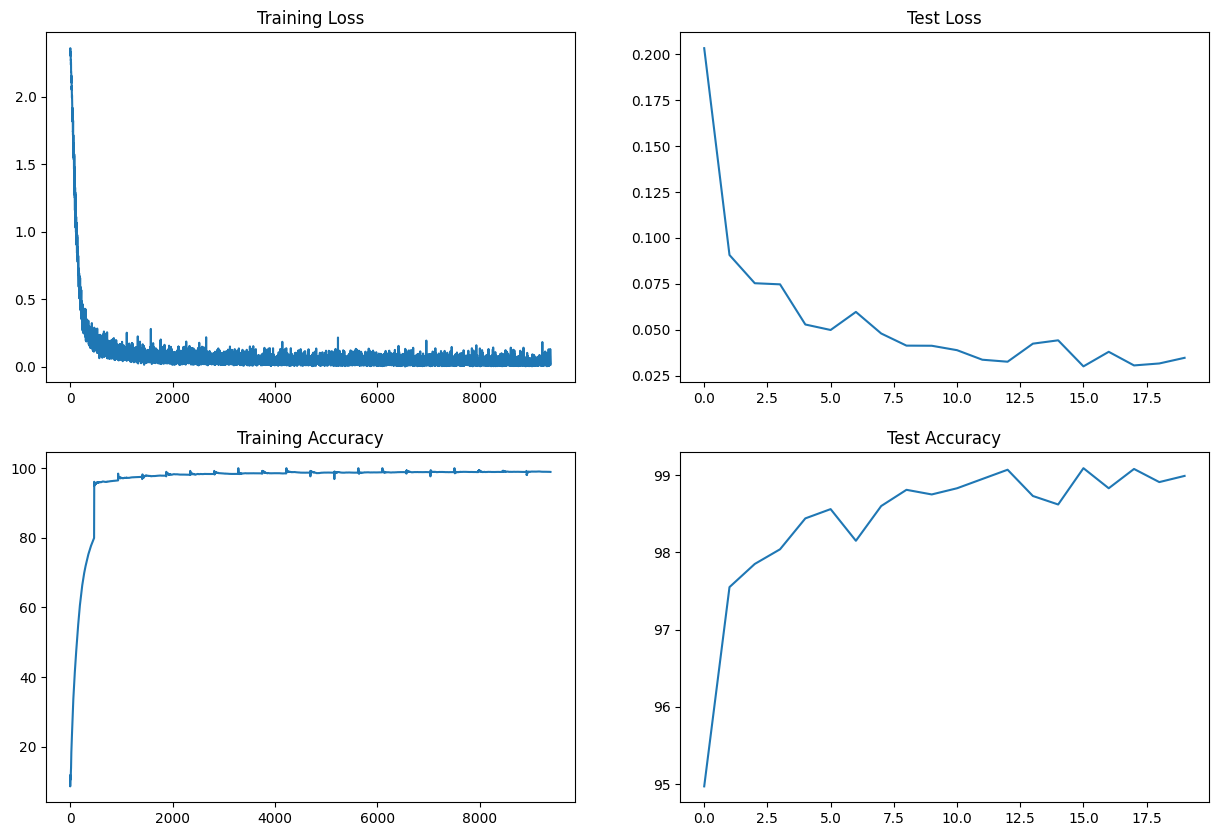

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## Step3 - ADD Code 8, 9 and Code 10

Since we are doing image augmentation where we are adding random rotation of 15 degrees to the train data. We are creating separate data ( train_aug, test_aug) and we are not using the above data used for Step-1 and 2. We created train loader and test loader for augmentation and used ReducedLROnPlateau scheduler.

In [3]:
# Train Phase transformations
train_transforms_aug = transforms.Compose([
                                      #  transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                      #  transforms.Resize((28, 28)),
                                       #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-15.0, 15.0), fill=(0,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms_aug = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

#### Load train and test dataset

In [4]:
train_aug = datasets.MNIST('./data', train=True, download=True, transform=train_transforms_aug)
test_aug = datasets.MNIST('./data', train=False, download=True, transform=test_transforms_aug)

#### Check if cuda is available and then create test and train dataloaders for augmented data.

In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)


# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader_aug = torch.utils.data.DataLoader(train_aug, **dataloader_args)

# test dataloader
test_loader_aug = torch.utils.data.DataLoader(test_aug, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#### Import Model_3 which includes adjusting max pooling and adding dropout at each layer.

In [6]:
from model import Model_3

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_nn3 = Model_3().to(device)
summary(model_nn3, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
      BatchNorm2d-10            [-1, 8, 24, 24]              16
             ReLU-11            [-1, 8, 24, 24]               0
          Dropout-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1

##### This function below test_aug is defined to return test loss which will be used by scheduler to update learning rates based on trend of the loss.

In [8]:
def test_aug(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))
    return test_loss

#### We are using ReduceLROnPlateau scheduler as we aim to reduce learning rate when a metric has stopped improving. We started with learning rate as 0.01 and decrease learning rate by factor ( 0.1 ) if the learning rate starts decreasing and not improved in the first 2 ( patience = 2) epochs

In [9]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model_nn3 =  Model_3().to(device)
optimizer = optim.SGD(model_nn3.parameters(), lr=0.01, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, threshold=0.0001, threshold_mode='rel')
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_nn3, device, train_loader_aug, optimizer, epoch)
    test_loss = test_aug(model_nn3, device, test_loader_aug)
    scheduler.step(test_loss)
    print("LR: ", scheduler.get_last_lr())

EPOCH: 0


Loss=0.12337499111890793 Batch_id=468 Accuracy=73.33: 100%|██████████| 469/469 [00:32<00:00, 14.38it/s]



Test set: Average loss: 0.1566, Accuracy: 9637/10000 (96.37%)

LR:  [0.01]
EPOCH: 1


Loss=0.09622668474912643 Batch_id=468 Accuracy=96.35: 100%|██████████| 469/469 [00:23<00:00, 19.58it/s]



Test set: Average loss: 0.0726, Accuracy: 9779/10000 (97.79%)

LR:  [0.01]
EPOCH: 2


Loss=0.08556679636240005 Batch_id=468 Accuracy=97.33: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]



Test set: Average loss: 0.0574, Accuracy: 9814/10000 (98.14%)

LR:  [0.01]
EPOCH: 3


Loss=0.1342855989933014 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:20<00:00, 22.64it/s]



Test set: Average loss: 0.0425, Accuracy: 9875/10000 (98.75%)

LR:  [0.01]
EPOCH: 4


Loss=0.1388959139585495 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:21<00:00, 22.16it/s]



Test set: Average loss: 0.0411, Accuracy: 9875/10000 (98.75%)

LR:  [0.01]
EPOCH: 5


Loss=0.06701582670211792 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]



Test set: Average loss: 0.0367, Accuracy: 9883/10000 (98.83%)

LR:  [0.01]
EPOCH: 6


Loss=0.09172099828720093 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]



Test set: Average loss: 0.0334, Accuracy: 9900/10000 (99.00%)

LR:  [0.01]
EPOCH: 7


Loss=0.02059781737625599 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]



Test set: Average loss: 0.0318, Accuracy: 9896/10000 (98.96%)

LR:  [0.01]
EPOCH: 8


Loss=0.04040604084730148 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:22<00:00, 20.55it/s]



Test set: Average loss: 0.0256, Accuracy: 9928/10000 (99.28%)

LR:  [0.01]
EPOCH: 9


Loss=0.007851144298911095 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:22<00:00, 20.89it/s]



Test set: Average loss: 0.0278, Accuracy: 9918/10000 (99.18%)

LR:  [0.01]
EPOCH: 10


Loss=0.026484066620469093 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]



Test set: Average loss: 0.0276, Accuracy: 9907/10000 (99.07%)

LR:  [0.01]
EPOCH: 11


Loss=0.05195770040154457 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:22<00:00, 21.00it/s]



Test set: Average loss: 0.0305, Accuracy: 9910/10000 (99.10%)

LR:  [0.001]
EPOCH: 12


Loss=0.030368918552994728 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]



Test set: Average loss: 0.0207, Accuracy: 9940/10000 (99.40%)

LR:  [0.001]
EPOCH: 13


Loss=0.08406265825033188 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]



Test set: Average loss: 0.0201, Accuracy: 9940/10000 (99.40%)

LR:  [0.001]
EPOCH: 14


Loss=0.06950286030769348 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:20<00:00, 22.55it/s]



Test set: Average loss: 0.0207, Accuracy: 9939/10000 (99.39%)

LR:  [0.001]


Text(0.5, 1.0, 'Test Accuracy')

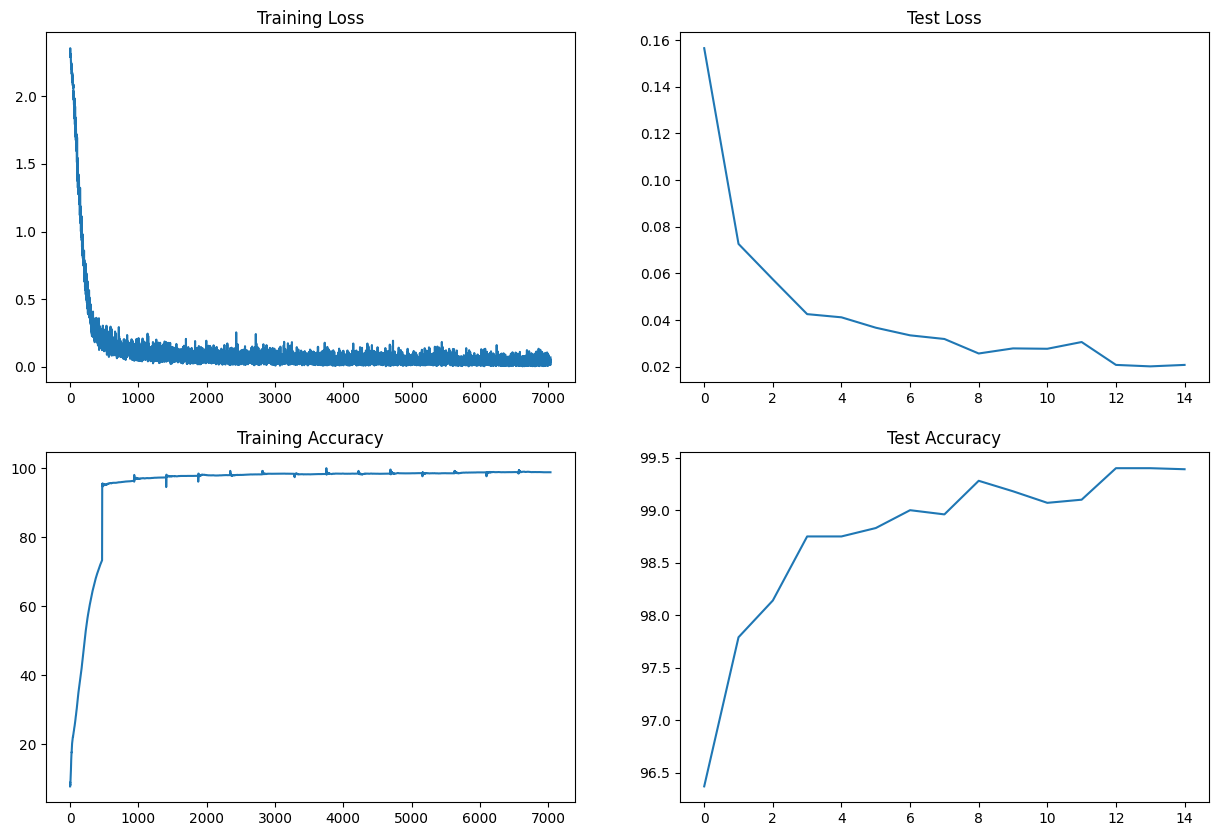

In [12]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")